In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Categories=['Cars','Ice cream cone','Cricket ball']
flat_data_arr=[]
target_arr=[]

In [5]:
data='C:/Users/SIR/OneDrive/Desktop/dataset'

In [6]:
for i in Categories:
    print(f'loading .... category:{i}')
    path=os.path.join(data,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading .... category:Cars


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/SIR/OneDrive/Desktop/dataset\\Cars'

In [8]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

In [9]:
df=pd.DataFrame(flat_data)
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1]#output data


In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
print("Splitted Successfully")

Splitted Successfully


In [16]:
model.fit(x_train,y_train)
print('Model trained well with the given images')

Model trained well with the given images


In [18]:
from sklearn.metrics import classification_report,accuracy_score
y_pred=model.predict(x_test)
print("The Predicted data is: ",y_pred)
print("The actual data is: ",np.array(y_test))
print(f'The model is {accuracy_score(y_pred,y_test)*100}%accurate')

The Predicted data is:  [0 2 1 2 0 2 0 1 0 2 0 0 0 1 0 1 0 1 1 1]
The actual data is:  [1 2 1 2 0 0 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
The model is 65.0%accurate


Enter URL of Imagehttps://media.istockphoto.com/id/1468178137/photo/close-up-side-view-of-an-orange-luxury-sports-car.jpg?s=612x612&w=is&k=20&c=smaUQuGCJHHRxOzULSNEpx0a4HMg5Ebjlf1tPeG6qL4=


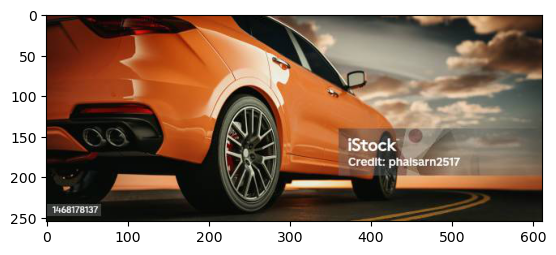

Cars=65.03796307751641%
Ice cream cone=6.5695458575038%
Cricket ball=28.39249106497978%
The predicted image is: Cars


In [25]:
url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val}={probability[0][ind]*100}%')
print("The predicted image is: "+Categories[model.predict(l)[0]])

Accuracy: 0.9805555555555555


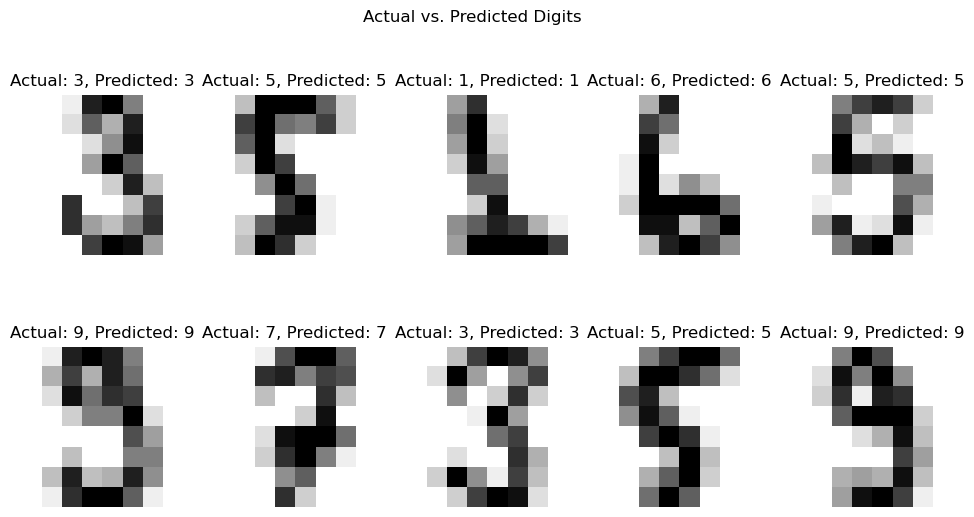

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Preprocess the data (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Select 10 random indices from the test set
indices = np.random.choice(len(y_test), 10, replace=False)

# Plot actual vs. predicted digits
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Actual vs. Predicted Digits')

for i, idx in enumerate(indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_test[idx].reshape(8, 8), cmap='binary', interpolation='nearest')
    ax.set_title(f'Actual: {y_test[idx]}, Predicted: {y_pred[idx]}')
    ax.axis('off')

plt.show()
